# Weather data
 Weather data is obtained from NOAA by submitting requests to [Local Climatological Data](https://www.ncdc.noaa.gov/cdo-web/datatools/lcd) and storing the results using the airport code name (e.g., SFO) as the file name.  
 
Note: LCD only allows at most 10 station-years of data per order. To collect 30 years of data, three orders must be collated manually.

In [1]:
import zipfile as zip
with zip.ZipFile("../data/PDX-raw.csv.zip","r") as zf:
    zf.extractall("../data")

In [2]:
import noaa
noaa.read_csv("../data/PDX-raw.csv").to_csv("PDX.csv")

In [3]:
import pandas as pd
data = pd.read_csv("PDX.csv").set_index('datetime')

In [4]:
print(data.index)
lo = data.heatindex.min()
hi = data.heatindex.max()
print(f"Peak heat {lo:1f} on {data[data.heatindex==lo].index}")
print(data[data.heatindex==hi])

Index(['2010-01-01 00:53:00', '2010-01-01 01:02:00', '2010-01-01 01:17:00',
       '2010-01-01 01:53:00', '2010-01-01 02:37:00', '2010-01-01 02:53:00',
       '2010-01-01 03:32:00', '2010-01-01 03:53:00', '2010-01-01 04:00:00',
       '2010-01-01 04:53:00',
       ...
       '1999-12-31 15:00:00', '1999-12-31 16:00:00', '1999-12-31 17:00:00',
       '1999-12-31 18:00:00', '1999-12-31 19:00:00', '1999-12-31 20:00:00',
       '1999-12-31 21:00:00', '1999-12-31 21:55:00', '1999-12-31 22:00:00',
       '1999-12-31 23:00:00'],
      dtype='object', name='datetime', length=330738)
Peak heat 7.700000 on Index(['2017-01-13 06:51:00'], dtype='object', name='datetime')
                     temperature  humidity  heatindex
datetime                                             
2009-07-28 15:53:00        105.0      20.0      104.3
2009-07-28 16:00:00        105.0      20.0      104.3
2009-07-29 14:53:00        105.0      20.0      104.3
2009-07-29 15:53:00        105.0      20.0      104.3
2009-07-

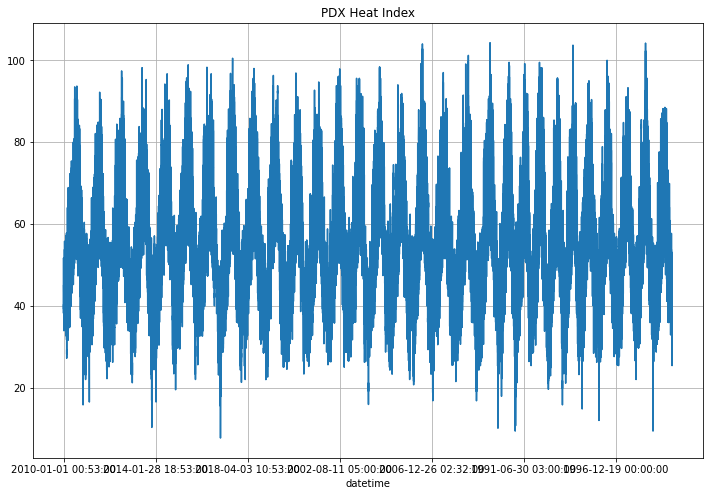

In [5]:
data.plot(y='heatindex', figsize=(12,8), grid=True, legend=False, title='PDX Heat Index')